SETUP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

Loading and exploring data

In [23]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def explore_data(data):
    print(data.head().T)
    print(data.describe())
    print(data.info())
    print('Valores nulos:')
    print(data.isna().mean()*100)

def plot_correlation_matrix(data):
    numericas = data.select_dtypes(exclude='object')
    matriz_correlacion = numericas.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap (matriz_correlacion, annot=True, fmt=".2f")
    plt.title('Mapa de Correlacion')
    plt.show()

def plot_histograms(data):
    data.hist(bins=15, figsize=(15, 15))
    plt.show()

def plot_feature_relationships(data, target):
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=column, y=target, data=data)
        plt.title(f'Relationship between total_UPDRS and {column}')
        plt.show()



In [10]:
data = load_data(r'C:\Users\chris\OneDrive\Escritorio\Proyecto\MLOPs\MLOPs\data\raw\parkinsons_updrs.data')

In [11]:
explore_data(data)

                       0          1          2          3          4
subject#        1.000000   1.000000   1.000000   1.000000   1.000000
age            72.000000  72.000000  72.000000  72.000000  72.000000
sex             0.000000   0.000000   0.000000   0.000000   0.000000
test_time       5.643100  12.666000  19.681000  25.647000  33.642000
motor_UPDRS    28.199000  28.447000  28.695000  28.905000  29.187000
total_UPDRS    34.398000  34.894000  35.389000  35.810000  36.375000
Jitter(%)       0.006620   0.003000   0.004810   0.005280   0.003350
Jitter(Abs)     0.000034   0.000017   0.000025   0.000027   0.000020
Jitter:RAP      0.004010   0.001320   0.002050   0.001910   0.000930
Jitter:PPQ5     0.003170   0.001500   0.002080   0.002640   0.001300
Jitter:DDP      0.012040   0.003950   0.006160   0.005730   0.002780
Shimmer         0.025650   0.020240   0.016750   0.023090   0.017030
Shimmer(dB)     0.230000   0.179000   0.181000   0.327000   0.176000
Shimmer:APQ3    0.014380   0.00994

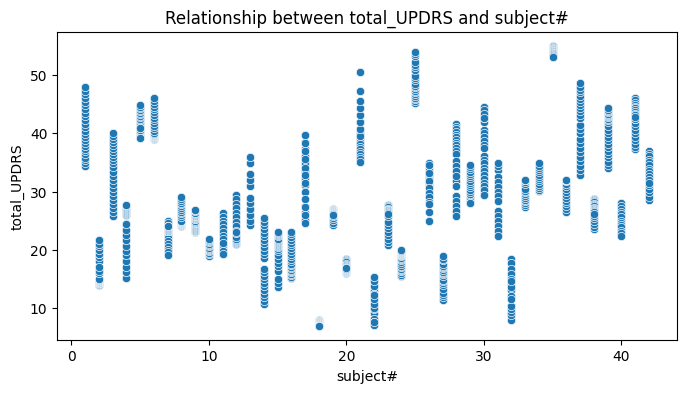

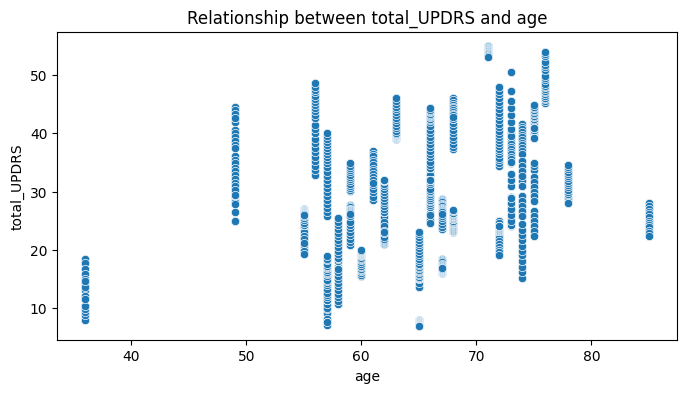

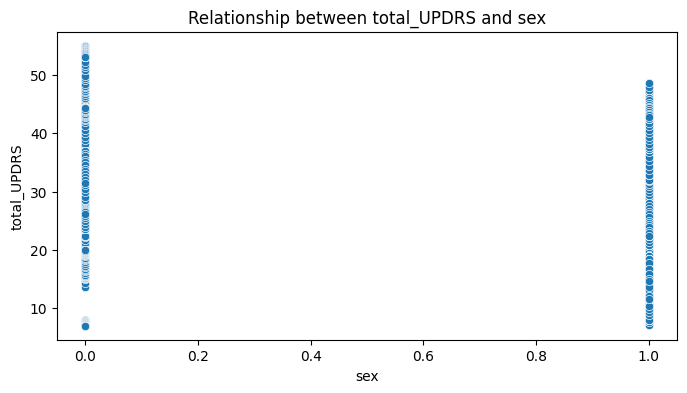

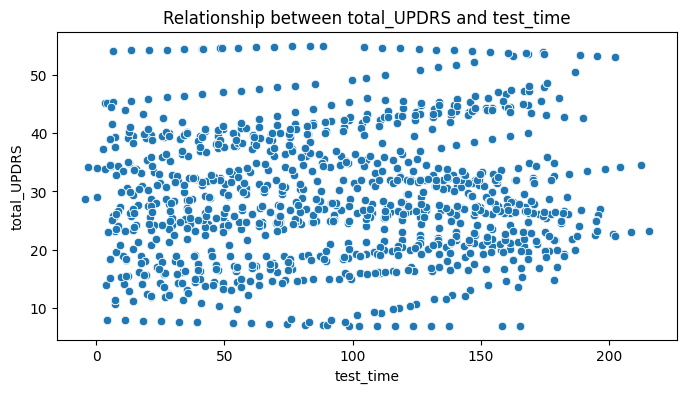

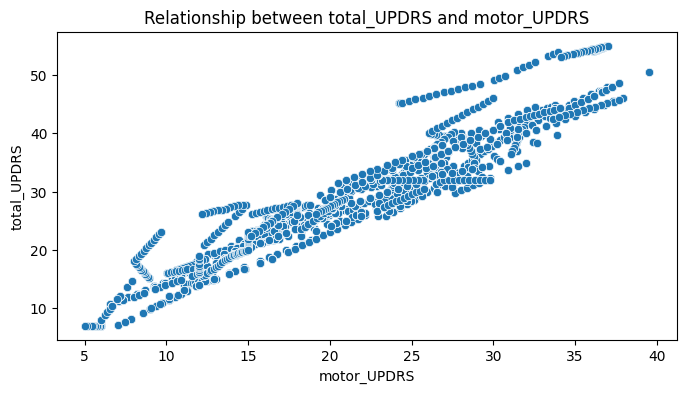

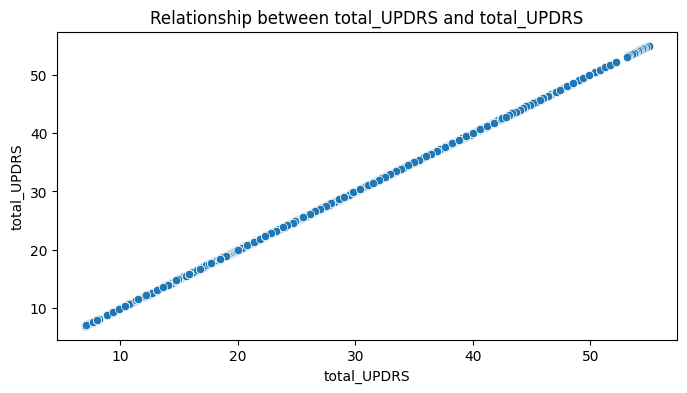

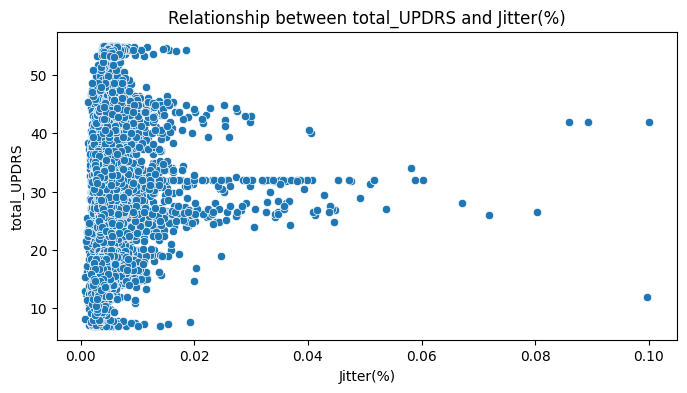

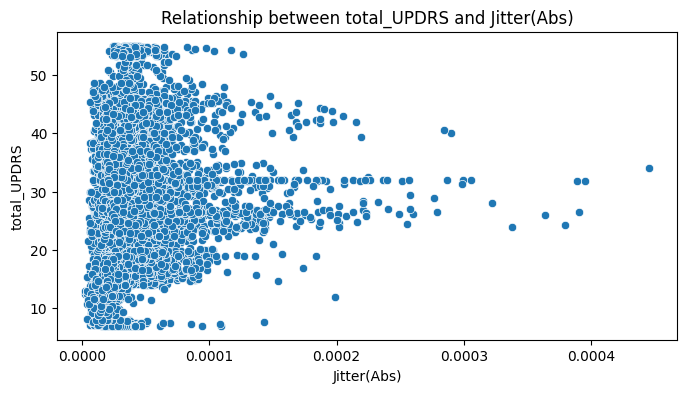

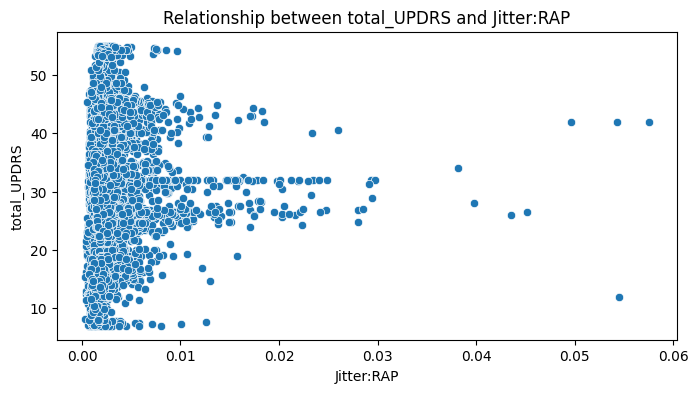

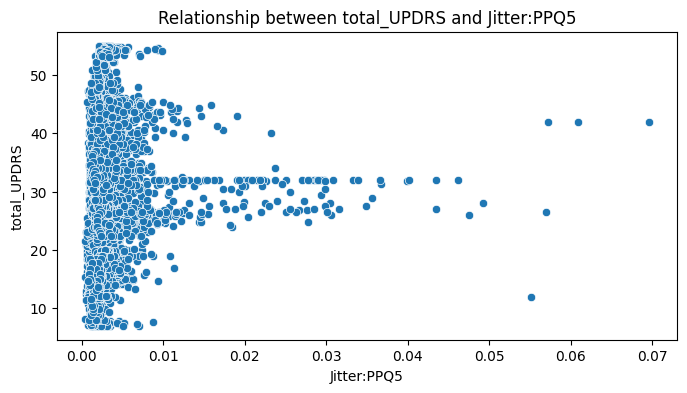

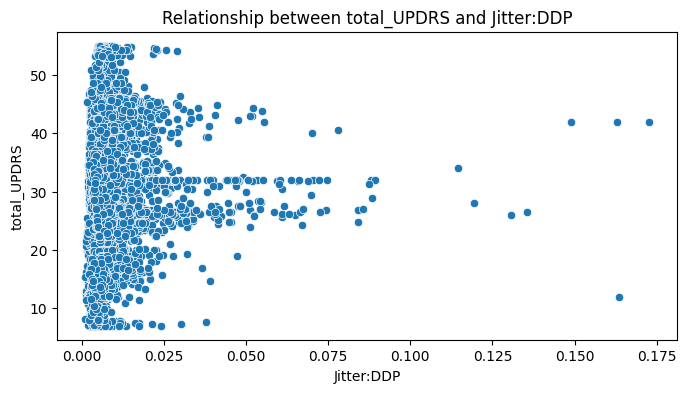

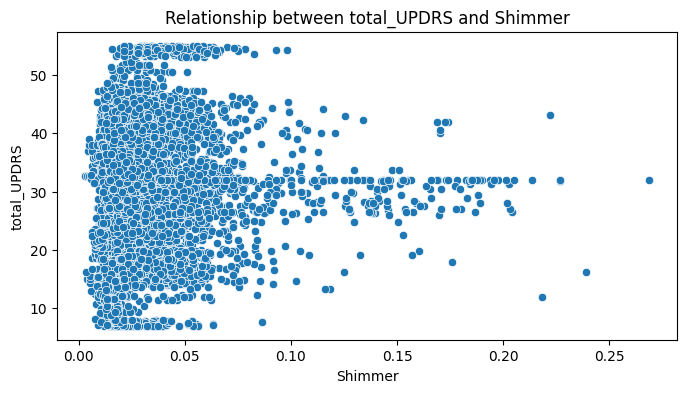

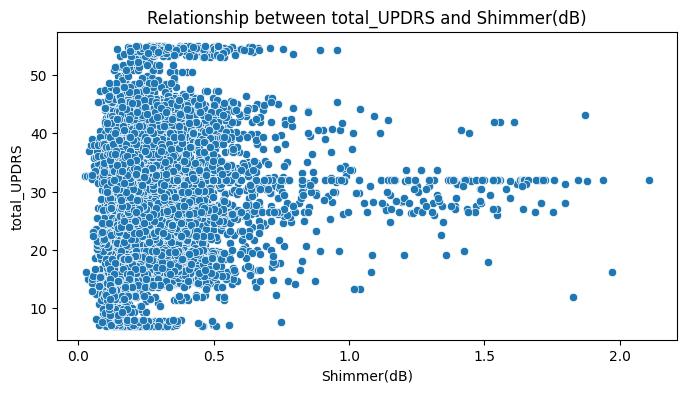

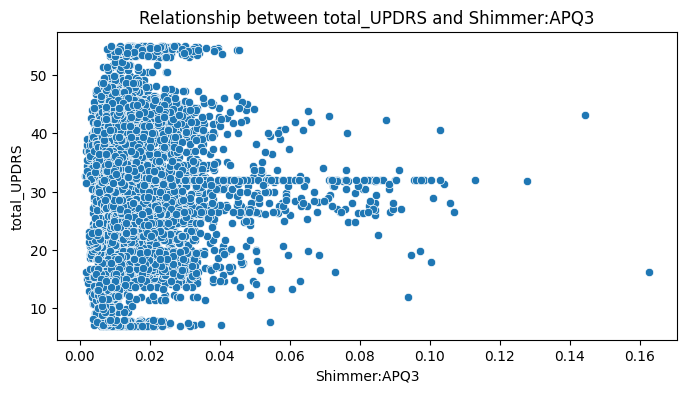

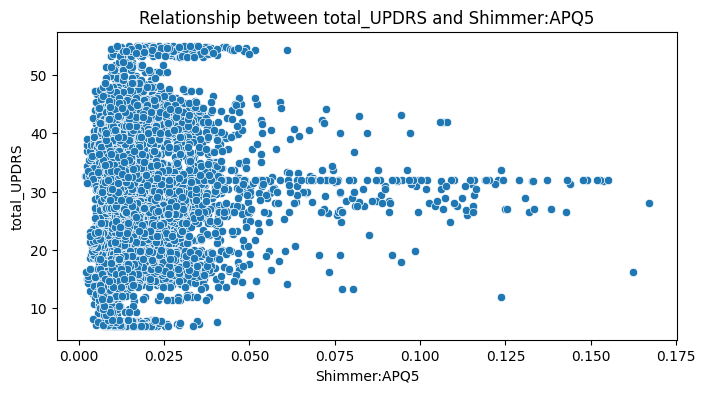

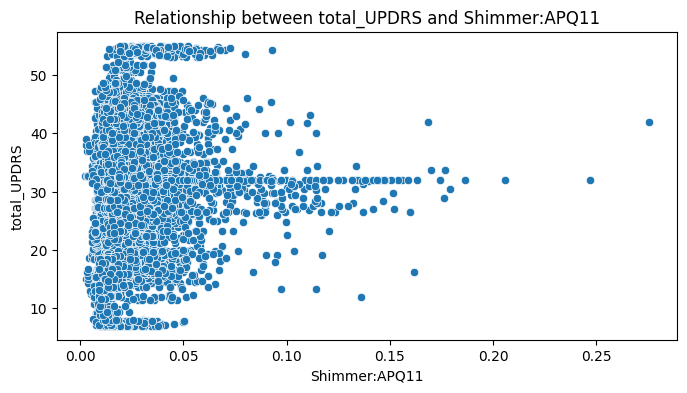

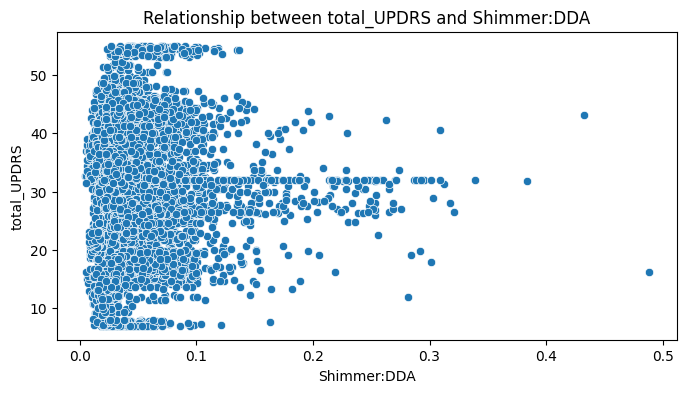

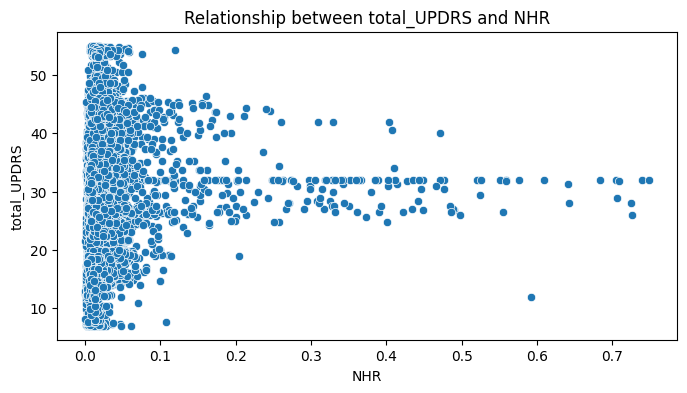

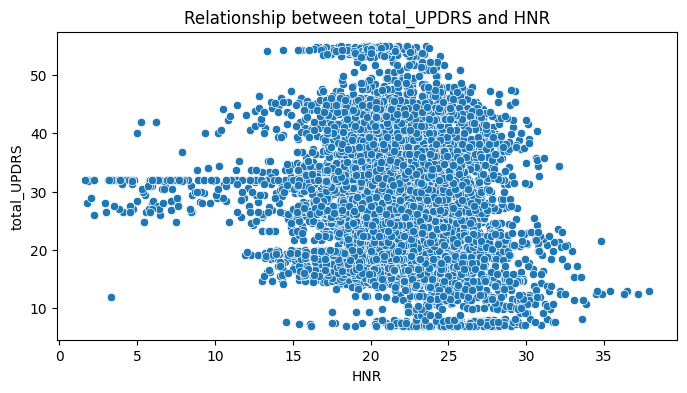

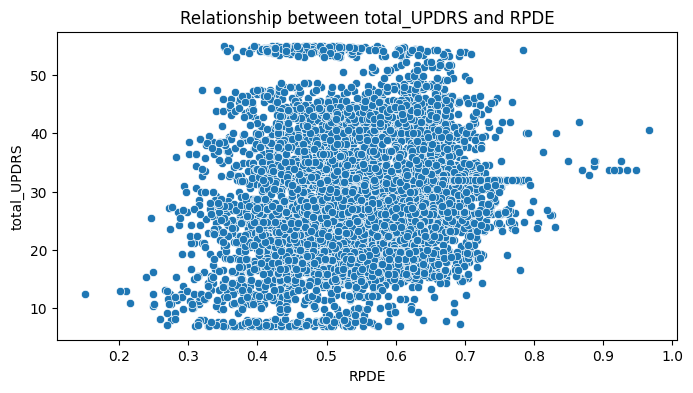

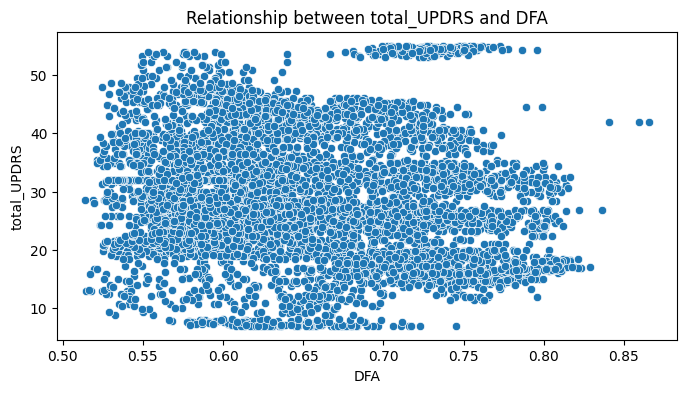

In [24]:
plot_feature_relationships(data,'total_UPDRS')

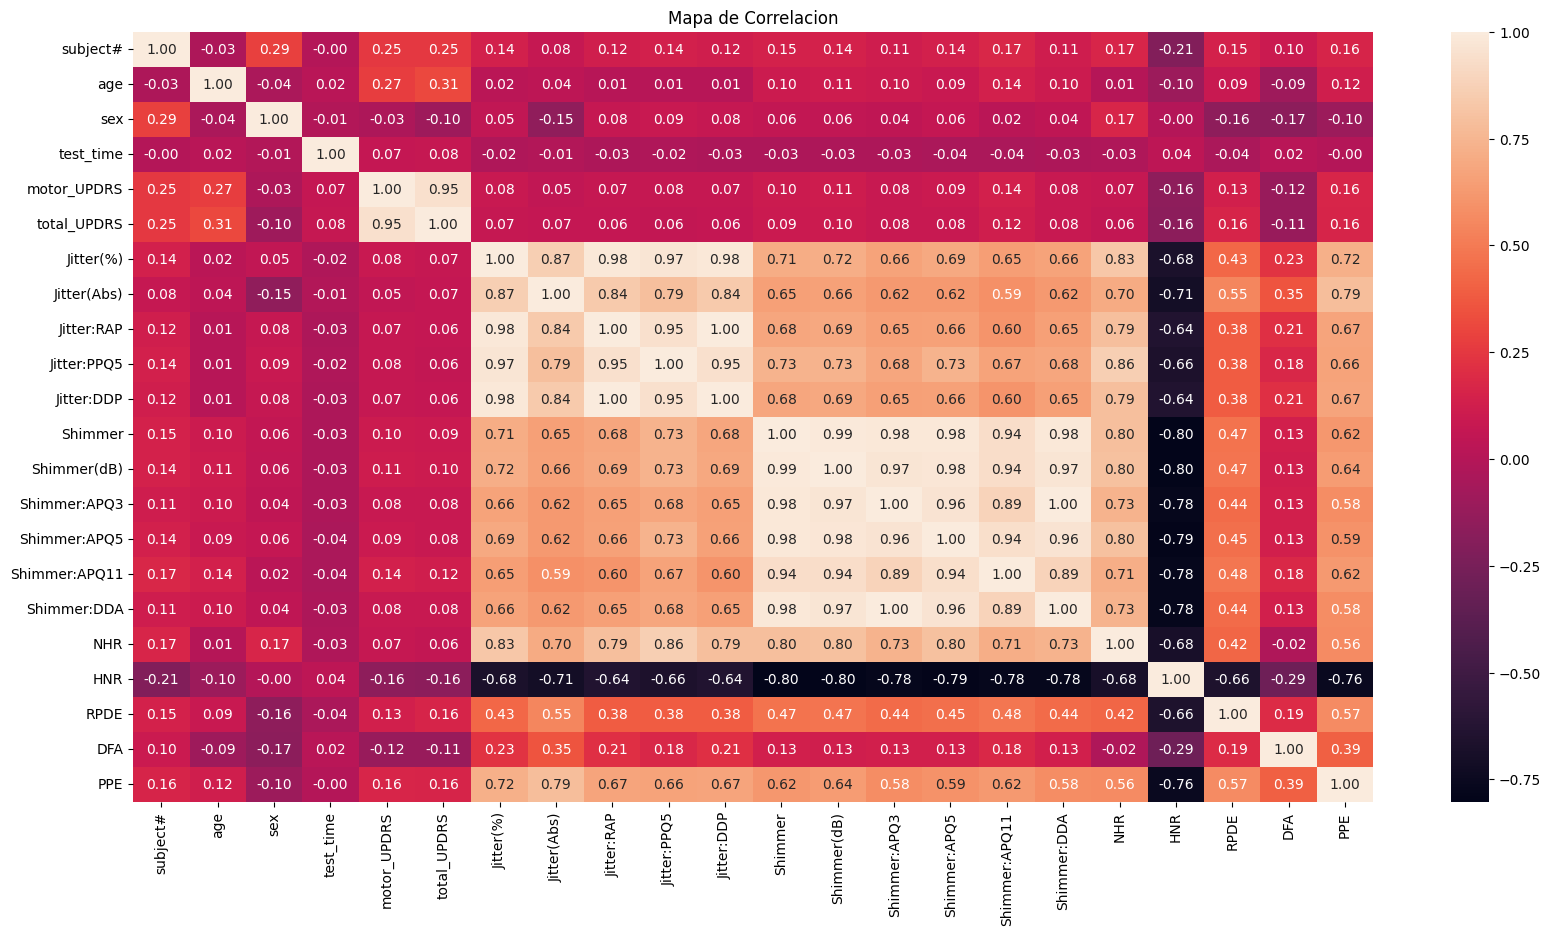

In [12]:
plot_correlation_matrix(data)

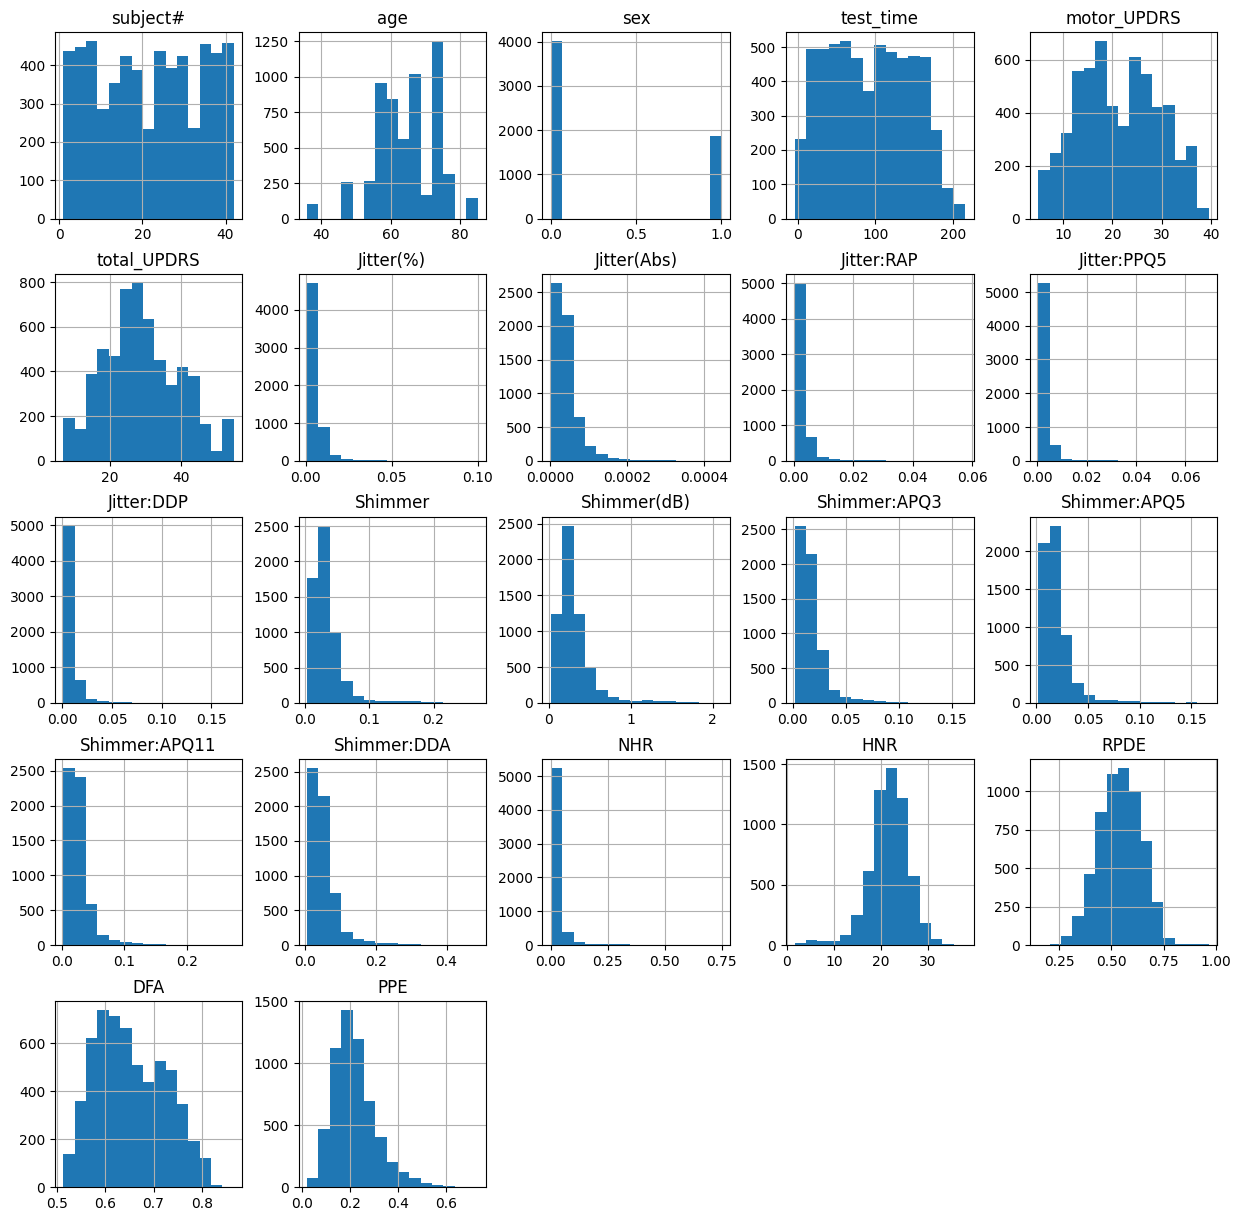

In [17]:
plot_histograms(data)

In [182]:
#Eliminar valores nulos
df.dropna(inplace=True)
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


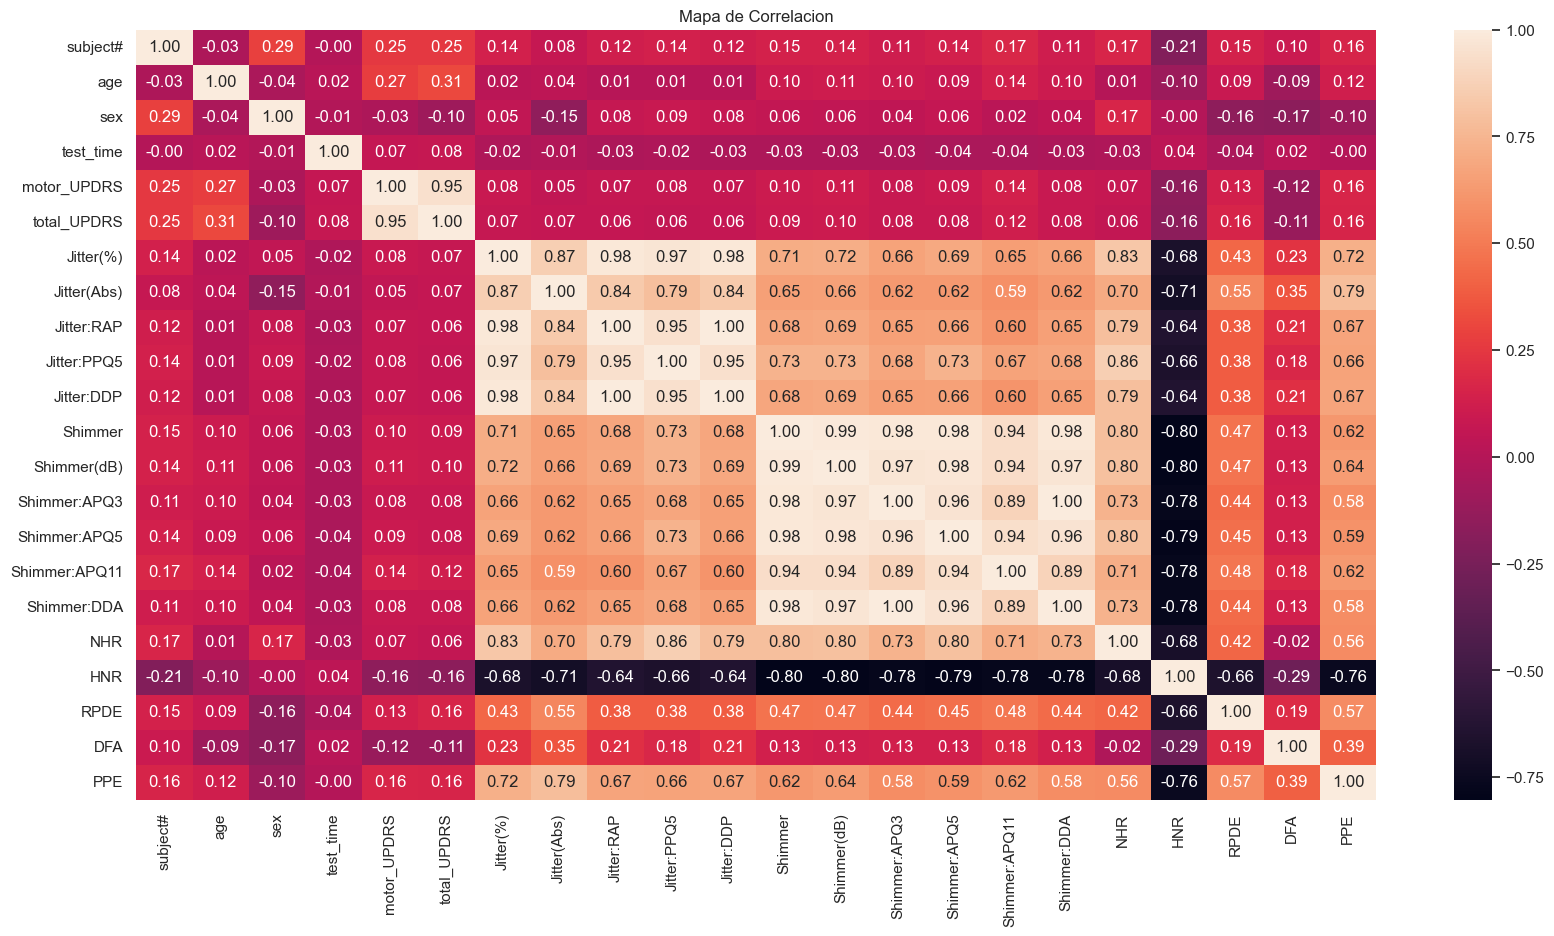

In [183]:
#Obteniedo correlacion entre las variables
numericas = df.select_dtypes(exclude='object')
matriz_correlacion = numericas.corr()

plt.figure(figsize=(20, 10))
sns.heatmap (matriz_correlacion, annot=True, fmt=".2f")
plt.title('Mapa de Correlacion')
plt.show()

**variables con alta correlación observando aquellas que presentan valores absolutos cercanos a 1**

Jitter(Abs) y Jitter(%): Correlación de 0.98.

Jitter(DPP) y Jitter(Abs): Correlación de 0.98.

Shimmer y Shimmer(dB): Correlación de 0.99.

Jitter(PPQ5) y Jitter(RAP): Correlación de 0.95.

Shimmer(APQ5) y Shimmer(APQ3): Correlación de 0.98.

Shimmer(DDA) y Shimmer(APQ11): Correlación de 0.98.

motor_UPDRS y total_UPDRS: Correlación de 0.95.

In [184]:
# #Correlacion entre variables
# sns.set(rc={'figure.figsize':(15,15)})
# sns.heatmap(round(df.corr(method='pearson', numeric_only=True),2), annot = True)
# plt.show()

#- Se observa alta correlación entre variables del mismo tipo (shimmer, jitter). Estas variables aportan poca información adicional y hará falta reducir la dimensionalidad mediante la selección de componentes principales.
#- La UPDRS parece tener correlación débil con variables como 'PPE', 'DFA', 'RPDE', 'HNR', 'Shimmer:APQ11' y 'age'.

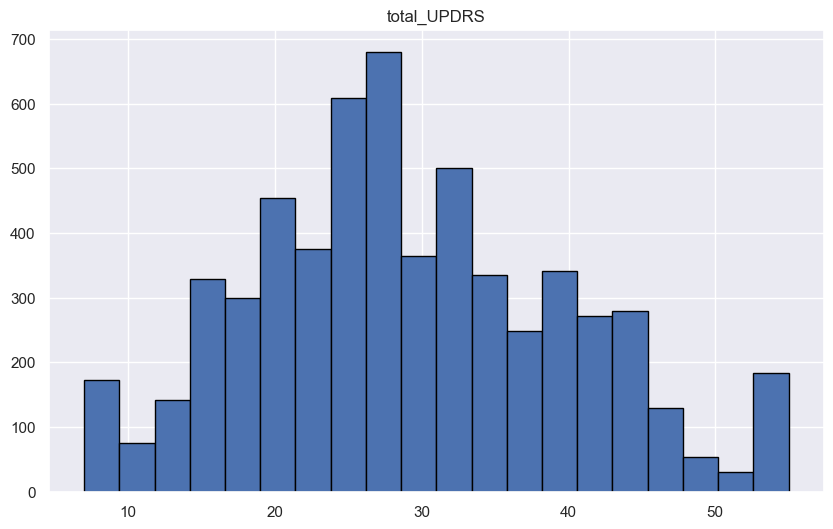

In [185]:
# Histograma para la variable 'total_UPDRS'
plt.figure(figsize=(10, 6))
df['total_UPDRS'].hist(bins=20, edgecolor='black')
plt.title('total_UPDRS')
plt.show()

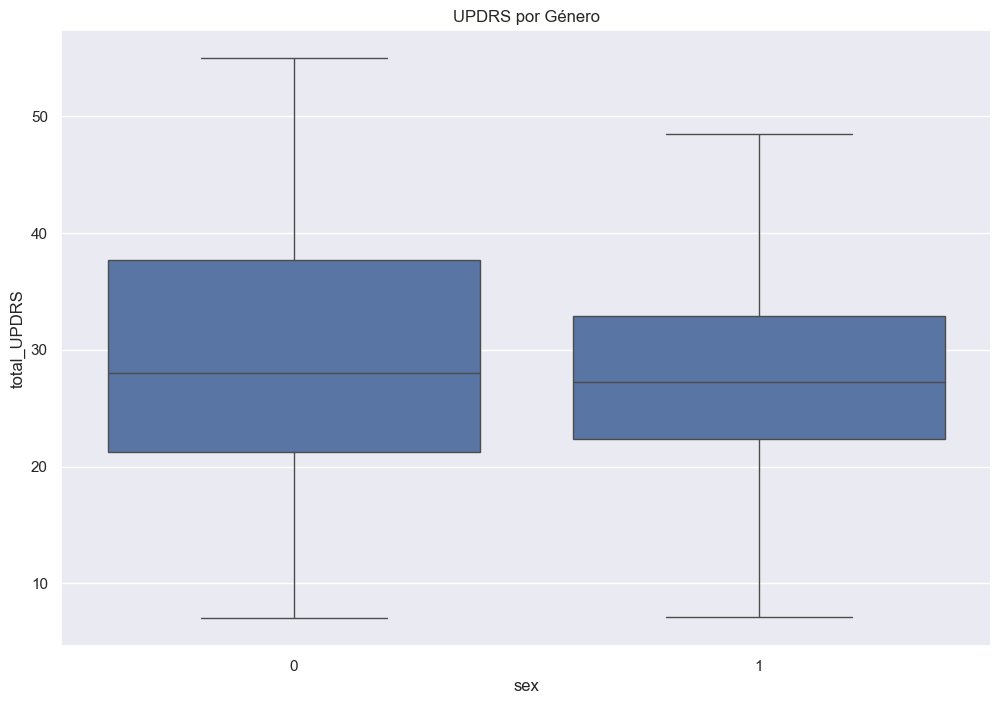

In [186]:
# Boxplots de UPDRS segun el genero
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='total_UPDRS', data=df)
plt.title('UPDRS por Género')
plt.show()

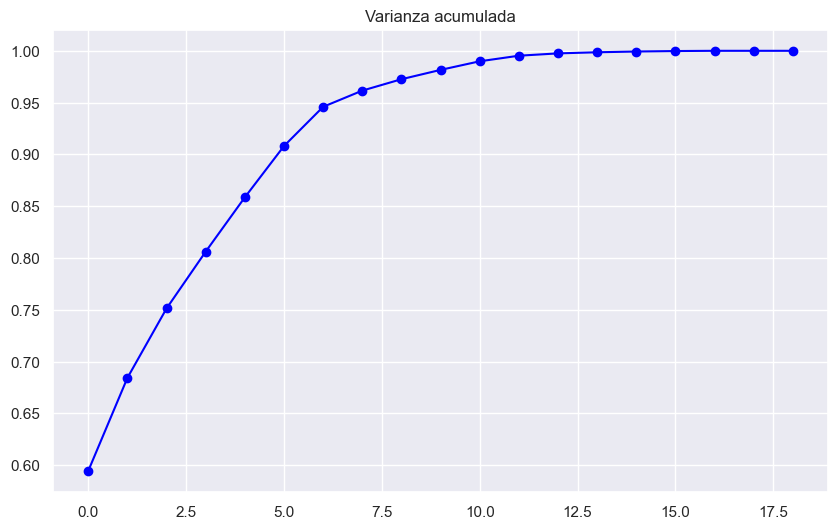

Número mínimo: 6


In [33]:
#Análisis de componentes principales

# Preprocesamiento: eliminación de filas con valores faltantes y selección de columnas numéricas
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['motor_UPDRS', 'total_UPDRS', 'sex'])
y = df['total_UPDRS']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA sin limitar el número de componentes para observar toda la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cálculo de la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Determinación del número de componentes para explicar más del 90% de la varianza
num_componentes_90 = np.where(varianza_acumulada >= 0.9)[0][0] + 1

# Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(varianza_acumulada, marker='o', linestyle='-', color='blue')
plt.title('Varianza acumulada')
plt.show()

# Impresión de resultados
print(f"Número mínimo: {num_componentes_90}")

- Los primeros 6 componentes principales explican el 90% de la varianza.

ENTRENAMIENTO Y MODELADO

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# Eliminar filas con valores nulos
df = pd.read_csv("parkinsons_updrs.data")
df = df.dropna()

'''
Columnas altamente correlacionadas (con un umbral de correlación mayor a 0.9) y, por lo tanto, 
son candidatas para ser eliminadas del dataset:
total_UPDRS
Jitter:RAP
Jitter:PPQ5
Jitter:DDP
Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
Shimmer:APQ11
Shimmer:DDA
'''

# Lista de columnas altamente correlacionadas
correlated_cols = []
for col in X:
    if 'total_UPDRS' in col or 'Jitter:RAP' in col or 'Jitter:PPQ5' in col or 'Jitter:DDP' in col or 'Shimmer(dB)' in col or 'Shimmer:APQ3' in col or 'Shimmer:APQ5' in col or 'Shimmer:APQ11' in col or 'Shimmer:DDA' in col:
        correlated_cols.append(col)

# Crear un ColumnTransformer para eliminar las columnas correlacionadas
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_correlated_cols', 'drop', correlated_cols)
    ],
    remainder='passthrough'  # Mantener el resto de las variables
)

# Eliminar las columnas con alta correlación
df = df.drop(columns=correlated_cols)

# Separar las características (X) y la variable objetivo (y)
X = df.drop(['motor_UPDRS'], axis=1)
y = df['total_UPDRS']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar un modelo de Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gbr_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.006441723084224537
R² Score: 0.9999418685482216


El Gradient Boosting Regressor parece estar funcionando muy bien para el conjunto de datos con el que está entrenado y probado. Los indicadores clave que mencionas, como el R² y el MSE, reflejan un rendimiento robusto del modelo:

Un R² de 0.999 implica que el modelo está capturando aproximadamente el 93.9% de la variación en los datos de salida.

Un MSE bajo (Error Cuadrático Medio) refuerza este rendimiento, sugiriendo que los errores en las predicciones del modelo son pequeños en promedio.

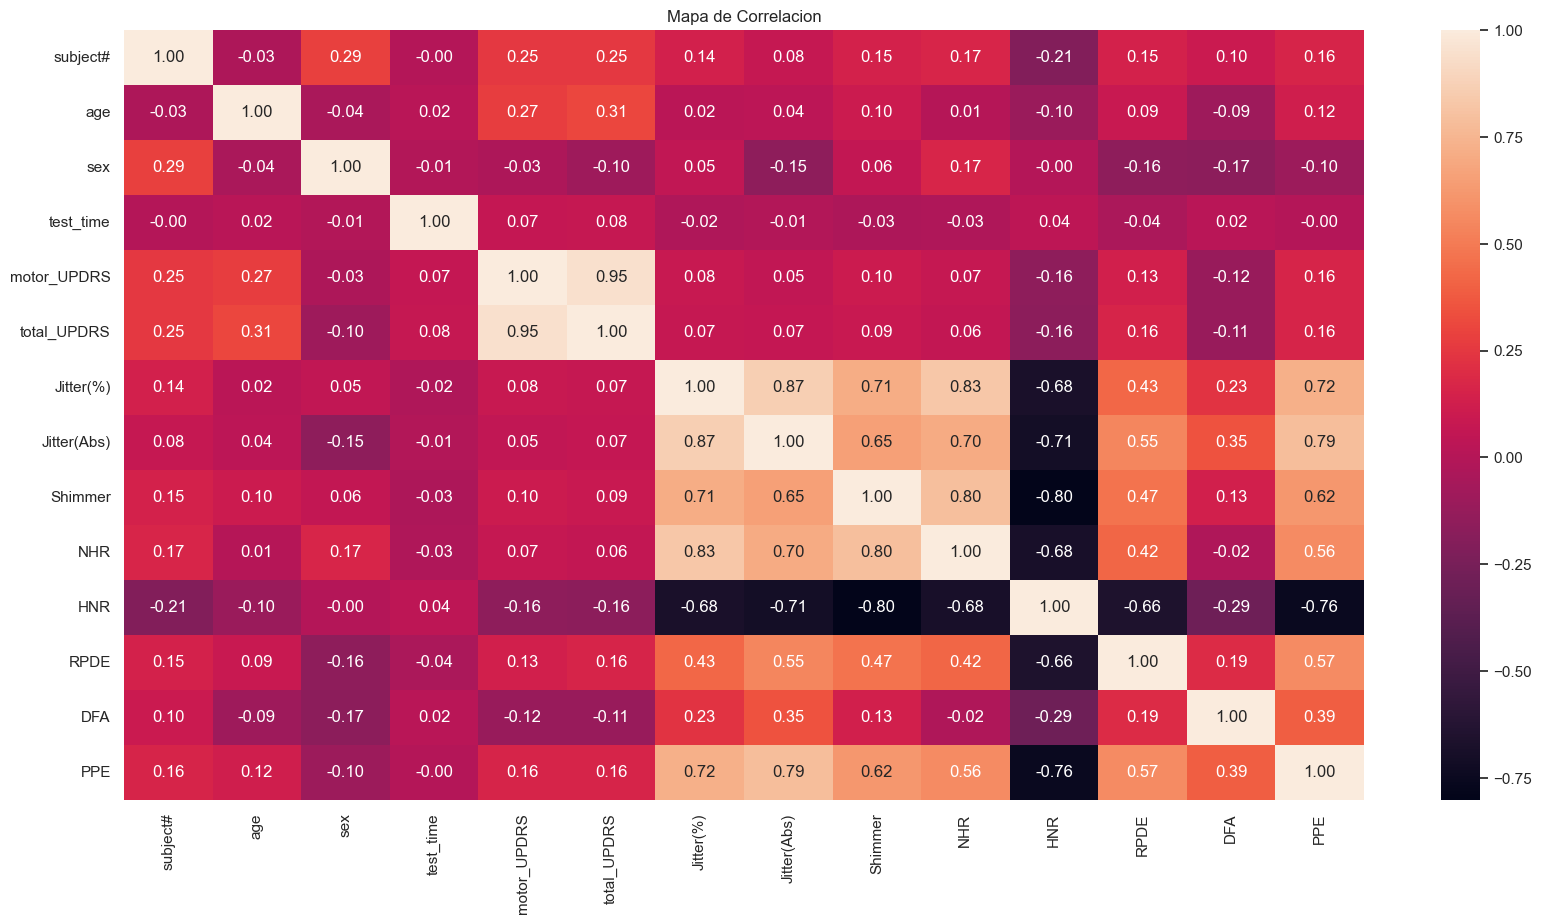

In [190]:
#Mapa de calor sin columnas con alta correlacion
numericas = df.select_dtypes(exclude='object')
matriz_correlacion = numericas.corr()

plt.figure(figsize=(20, 10))
sns.heatmap (matriz_correlacion, annot=True, fmt=".2f")
plt.title('Mapa de Correlacion')
plt.show()

In [1]:
import yaml

In [5]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)


In [6]:
config['data_load']['dataset_csv']

'data/raw/parkinsons_updrs.data'